# Research note

After studied dnu-numax diagram, how about taking a look at mass-radius diagram?


In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import os
import sys
rootpath='/Users/yaguang/Dropbox (Sydney Uni)/Work/nike/'#'/Users/yali4742/Dropbox (Sydney Uni)/Work/nike/'
sys.path.append(rootpath)
# from lib.histdist import distance_to_edge

In [7]:
# these are the corrected mass and radius
samples = np.load(rootpath+"sample/obs/yu18.npy",allow_pickle=True).tolist()
mobs, robs = samples["mass"], samples["radius"]
mobs_nc, robs_nc = samples["mass_nc"], samples["radius_nc"]

samples = np.load(rootpath+"sample/padova/padova.npy",allow_pickle=True).tolist()
mpdv, rpdv = samples["mass"], samples["radius"]
mpdv_nc, rpdv_nc = samples["mass"], samples["radius"]


In [101]:
import scipy.spatial.distance
import scipy.interpolate

def distance_to_edge(xdata, ydata, xedge, yedge, tcks, tp, diagram="tnu", distance="shortest"):

    if not (diagram in ["tnu", "mr"]):
        raise ValueError("diagram should be in ['tnu', 'mr']")
    if not (distance in ["vertical", "horizontal"]):
        raise ValueError("distance should be in ['vertical', 'horizontal']")
    # Ndata, Nedge = xdata.shape[0], xedge.shape[0]

    if distance=="vertical": #y
        if diagram=="tnu":
            idx = xdata >= xedge.min()
            xdata, ydata = xdata[idx], ydata[idx]
            dist = np.zeros(xdata.shape[0])

            # first consider clumps, upper part
            idx = xedge<tp[0]
            yp = yedge[idx][xedge[idx]==xedge[idx].min()][0]
            idx_data = (ydata >= yp) & (xdata<=31) 
            idx_edge = (yedge >= yp) & (xedge<=31) 
            if xdata[idx_data].shape[0] != 0:
                Xa = np.array([xdata[idx_data]]).T
                Xb = np.array([xedge[idx_edge]]).T
                Y = scipy.spatial.distance.cdist(Xa, Xb)
                argdist = np.argmin(Y, axis=1)
                dist[idx_data] = (ydata[idx_data] - yedge[idx_edge][argdist]) 
            
            # next, consider clumps (lower part) and secondary clumps
            idx_data = ~idx_data
            idx_edge = ~idx_edge  
            Xa = np.array([xdata[idx_data]]).T
            Xb = np.array([xedge[idx_edge]]).T
            Y = scipy.spatial.distance.cdist(Xa, Xb)
            argdist = np.argmin(Y, axis=1)
            dist[idx_data] = -(ydata[idx_data] - yedge[idx_edge][argdist]) 
        else:# diagram=="mr":
            Xa = np.array([xdata]).T
            Xb = np.array([xedge]).T
            Y = scipy.spatial.distance.cdist(Xa, Xb)
            argdist = np.argmin(Y, axis=1)
            dist = (ydata - yedge[argdist])
            
            
    if distance=="horizontal": #x
        if diagram=="tnu":
            idx = ydata >= yedge.min()
            xdata, ydata = xdata[idx], ydata[idx]
            dist = np.zeros(xdata.shape[0])
            
            # first consider clumps, left part
            idx = xedge<tp[0]
            xp = xedge[idx][yedge[idx]==yedge[idx].min()][0]
            idx_data = xdata <= xp
            idx_edge = xedge <= xp
            if xdata[idx_data].shape[0] != 0:
                Xa = np.array([ydata[idx_data]]).T
                Xb = np.array([yedge[idx_edge]]).T
                Y = scipy.spatial.distance.cdist(Xa, Xb)
                argdist = np.argmin(Y, axis=1)
                dist[idx_data] = -(xdata[idx_data] - xedge[idx_edge][argdist]) 
                
            # next, consider clumps (right part)
            idx_data = (xdata > xp) & (xdata<= tp[0])
            idx_edge = (xedge > xp) & (xedge<= tp[0])
            Xa = np.array([ydata[idx_data]]).T
            Xb = np.array([yedge[idx_edge]]).T
            Y = scipy.spatial.distance.cdist(Xa, Xb)
            argdist = np.argmin(Y, axis=1)
            dist[idx_data] = (xdata[idx_data] - xedge[idx_edge][argdist]) 

            # finally, consider secondary clumps
            idx_data = (xdata > tp[0])
            idx_edge = (xedge > tp[0])
            Xa = np.array([ydata[idx_data]]).T
            Xb = np.array([yedge[idx_edge]]).T
            Y = scipy.spatial.distance.cdist(Xa, Xb)
            argdist = np.argmin(Y, axis=1)
            dist[idx_data] = -(xdata[idx_data] - xedge[idx_edge][argdist]) 
            
        else:# diagram=="mr":
            idx = (ydata <= yedge[xedge<tp[0]].max())
            xdata, ydata = xdata[idx], ydata[idx]
            dist = np.zeros(xdata.shape[0])
            # first, consider left part of clumps
            idx = xedge<tp[0]
            xp = xedge[idx][yedge[idx]==yedge[idx].max()][0]
            idx_data = xdata <= xp
            idx_edge = xedge <= xp
            if xdata[idx_data].shape[0] != 0:
                Xa = np.array([ydata[idx_data]]).T
                Xb = np.array([yedge[idx_edge]]).T
                Y = scipy.spatial.distance.cdist(Xa, Xb)
                argdist = np.argmin(Y, axis=1)
                dist[idx_data] = -(xdata[idx_data] - xedge[idx_edge][argdist]) 

            # next, consider right part of clumps
            idx_data = (xdata > xp) & (xdata<=tp[0])
            idx_edge = (xedge > xp) & (xedge<=tp[0])
            Xa = np.array([ydata[idx_data]]).T
            Xb = np.array([yedge[idx_edge]]).T
            Y = scipy.spatial.distance.cdist(Xa, Xb)
            argdist = np.argmin(Y, axis=1)
            dist[idx_data] = (xdata[idx_data] - xedge[idx_edge][argdist])             

            # finally, secondary clumps
            idx_data = (xdata>tp[0])
            idx_edge = (xedge>tp[0])
            Xa = np.array([ydata[idx_data]]).T
            Xb = np.array([yedge[idx_edge]]).T
            Y = scipy.spatial.distance.cdist(Xa, Xb)
            argdist = np.argmin(Y, axis=1)
            dist[idx_data] = -(xdata[idx_data] - xedge[idx_edge][argdist])      
            
#     # signs: left or right?
#     if diagram=="tnu":
#         # clumps
#         idx_right = xdata>10.0**scipy.interpolate.splev(np.log10(xdata**0.75/ydata), tcks[0], der=0)
#         idx = idx_right & (xdata<tp[0])
#         dist[idx] = -dist[idx]
        
#         # secondary clumps
#         idx_right = xdata>10.0**scipy.interpolate.splev(np.log10(xdata**0.75/ydata), tcks[1], der=0)
#         idx = idx_right & (xdata>=tp[0])
#         dist[idx] = -dist[idx]        
#     if diagram=="mr":
#         # clumps
#         idx_right = ydata<scipy.interpolate.splev(xdata, tcks[0], der=0)
#         idx = idx_right & (xdata<tp[0])
#         dist[idx] = -dist[idx]
        
#         # secondary clumps
#         idx_right = ydata<scipy.interpolate.splev(xdata, tcks[1], der=0)
#         idx = idx_right & (xdata>=tp[0])
#         dist[idx] = -dist[idx]

    return dist, xdata, ydata

In [102]:
def edge_analysis(xdata, ydata, filepath, points, tp, title):
    # plot mass-radius diagrams
    fig = plt.figure(figsize=(12,12))
    axes = fig.subplots(nrows=2,ncols=1, squeeze=False).reshape(-1)
    for i in range(2):
        axes[i].axis([0., 4., 5., 20.])
        axes[i].set_title(title)
        axes[i].grid(which="both")
        axes[i].set_xlabel("mass")
        axes[i].set_ylabel("radius")
        

    # cubic spline interpolation
    # points
    tcks = []
    xmin = min(np.array([points[0][i][0] for i in range(len(points[0]))]).min(), np.array([points[1][i][0] for i in range(len(points[1]))]).min())
    xmax = max(np.array([points[0][i][0] for i in range(len(points[0]))]).max(), np.array([points[1][i][0] for i in range(len(points[1]))]).max())
    xedge = np.arange(xmin, xmax, 0.0005)
    yedge = np.zeros(len(xedge))
    idx = [xedge<tp[0], xedge>=tp[0]]
    print(xmin, xmax)
    for j, point in enumerate(points):
        Npoint = len(point)
        xpoint, ypoint = np.array([point[i][0] for i in range(Npoint)]), np.array([point[i][1] for i in range(Npoint)])
        import scipy.interpolate
        tck = scipy.interpolate.splrep(xpoint, ypoint, s=0)
        tcks.append(tck)

        # plot knots and edge 
        axes[0].plot(xpoint, ypoint, "k.", markersize=10)
        axes[1].plot(xpoint, ypoint, "k.", markersize=10)
        yedge[idx[j]] = scipy.interpolate.splev(xedge[idx[j]], tck, der=0)
    
    axes[0].plot(xedge, yedge, "k.", ms=0.2) 
    axes[1].plot(xedge, yedge, "k.", ms=0.2) 
    
    # save spline coefficients
    np.save(filepath+"mr_spline_tck", [tcks, tp])

    # save edges
    np.save(filepath+"mr_edge_samples", np.array([xedge, yedge]).T)

    dx, mx, rx = distance_to_edge(xdata, ydata, xedge, yedge, tcks, tp, diagram="mr", distance="horizontal")
    dy, my, ry = distance_to_edge(xdata, ydata, xedge, yedge, tcks, tp, diagram="mr", distance="vertical")
    axes[0].plot(mx, rx, "r.", markersize=2, label="horizontal data")
    axes[1].plot(my, ry, "b.", markersize=2, label="vertical data")
    axes[0].legend()
    axes[1].legend()
    
    # # now plot histograms
    fig = plt.figure(figsize=(12,12))
    axes = fig.subplots(nrows=2,ncols=1)
    axes[0].set_xlim(-2, 4)
    axes[1].set_xlim(-2, 4)
    bins0 = np.linspace(-2, 12, 600)
    bins1 = np.linspace(-2, 12, 600)
    # bins0 = np.linspace(distn.min(), distn.max(), 1500)
    # bins1 = np.linspace(distt.min(), distt.max(), 1500)
    h=axes[0].hist(dx, histtype="step", color="red",
        bins=bins0, zorder=0)
    h=axes[1].hist(dy, histtype="step", color="red",
        bins=bins1, zorder=0)
    axes[0].set_xlabel("Horizontal distance")
    axes[1].set_xlabel("Vertical distance")
    axes[0].set_ylabel("Ncount")
    axes[1].set_ylabel("Ncount")
    axes[0].grid(which="both")
    axes[1].grid(which="both")
    axes[0].set_title(title)
    axes[1].set_title(title)
    plt.show()
    return


0.57 4.0


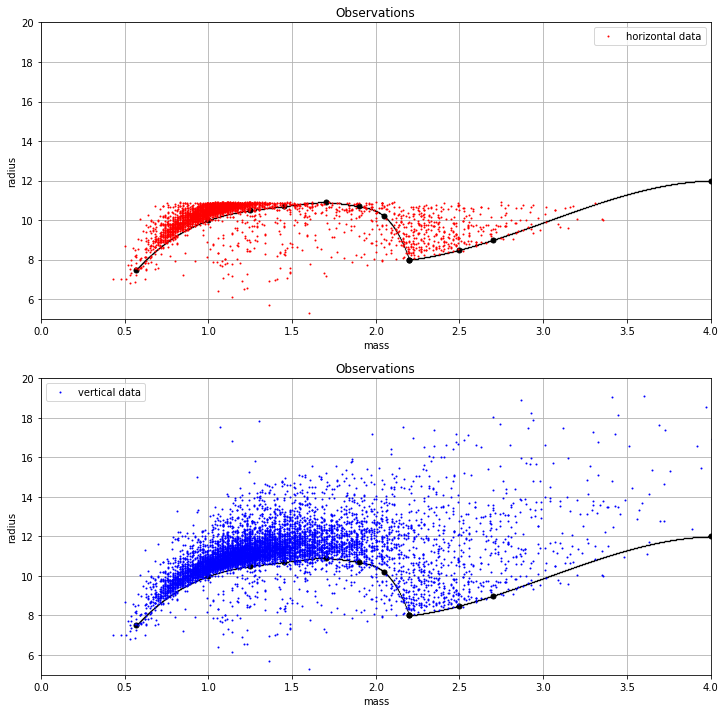

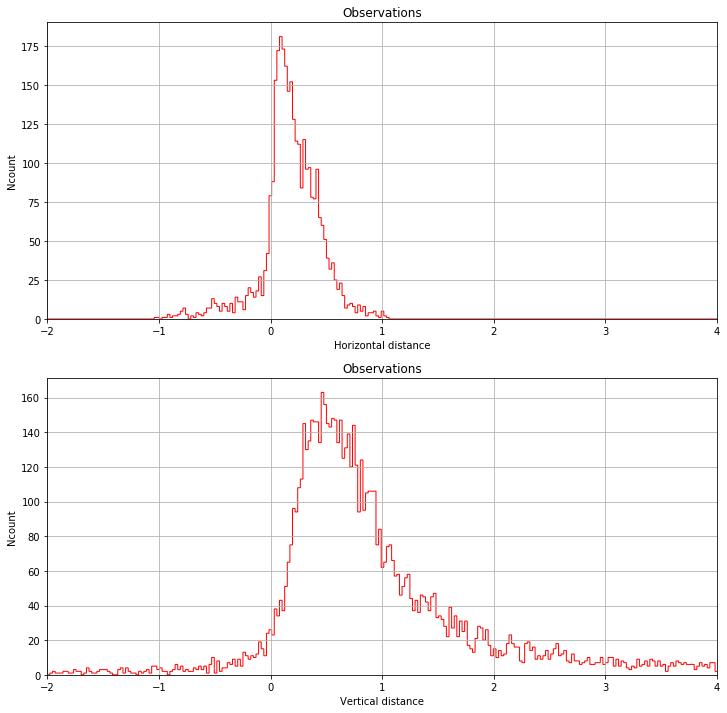

0.57 4.0


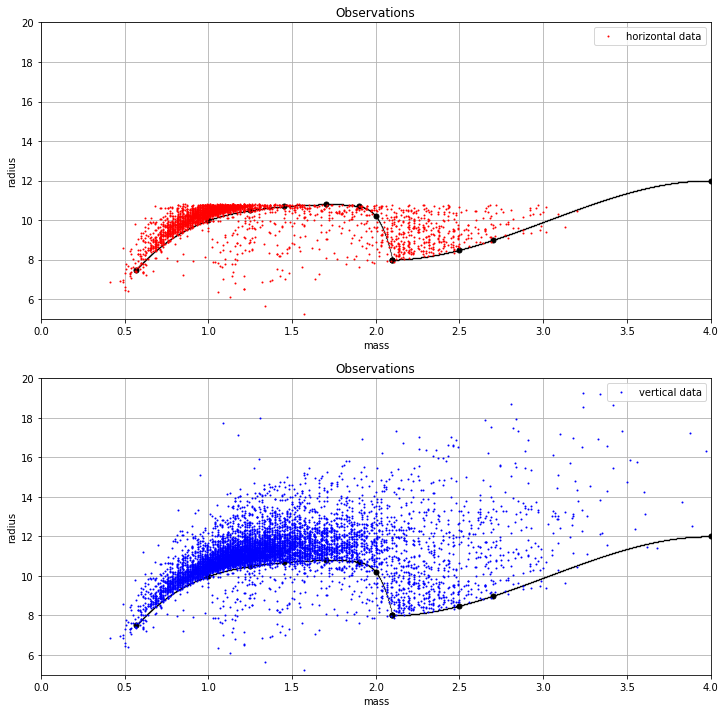

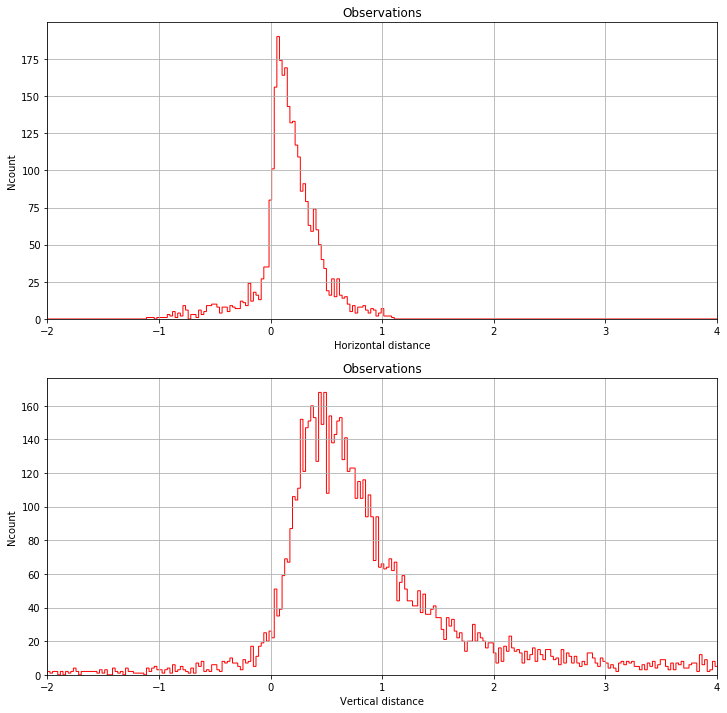

In [103]:
filepath = rootpath+"sample/obs/"
points1=[(0.57, 7.5), (1.0, 10.0), (1.25, 10.5), (1.45, 10.7), (1.7, 10.9), (1.9, 10.7), (2.05, 10.2), (2.2, 8.0)]
points2=[(2.2, 8.0), (2.5, 8.5), (2.7, 9.0), (4.0, 12)]
points = [points1, points2]
tp = (2.2, 8.0)
title = "Observations"
edge_analysis(mobs, robs, filepath, points, tp, title)

filepath = rootpath+"sample/obs_nc/"
points1=[(0.57, 7.5), (1.0, 10.0), (1.25, 10.5), (1.45, 10.7), (1.7, 10.8), (1.9, 10.7), (2.0, 10.2), (2.1, 8.0)]
points2=[(2.1, 8.0), (2.5, 8.5), (2.7, 9.0), (4.0, 12)]
points = [points1, points2]
tp = (2.1, 8.0)
title = "Observations"
edge_analysis(mobs_nc, robs_nc, filepath, points, tp, title)

0.8 2.2


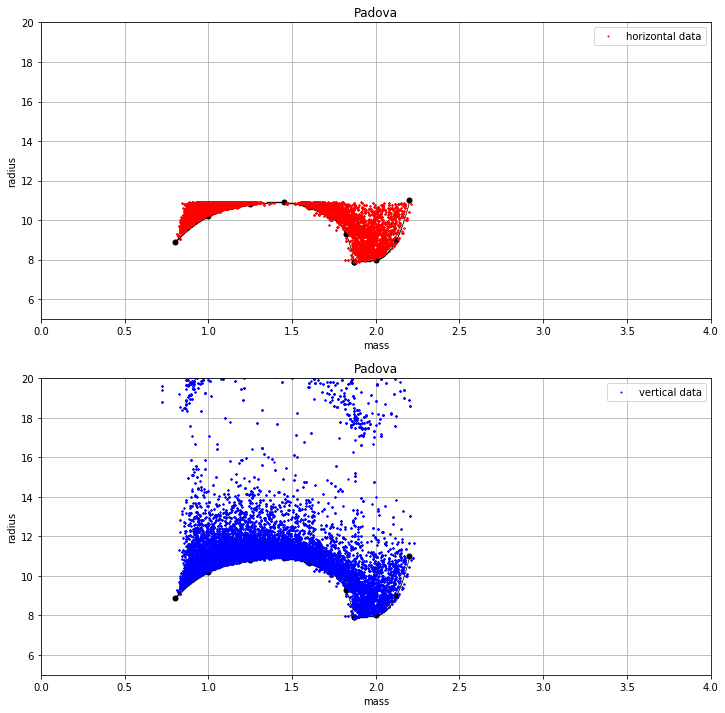

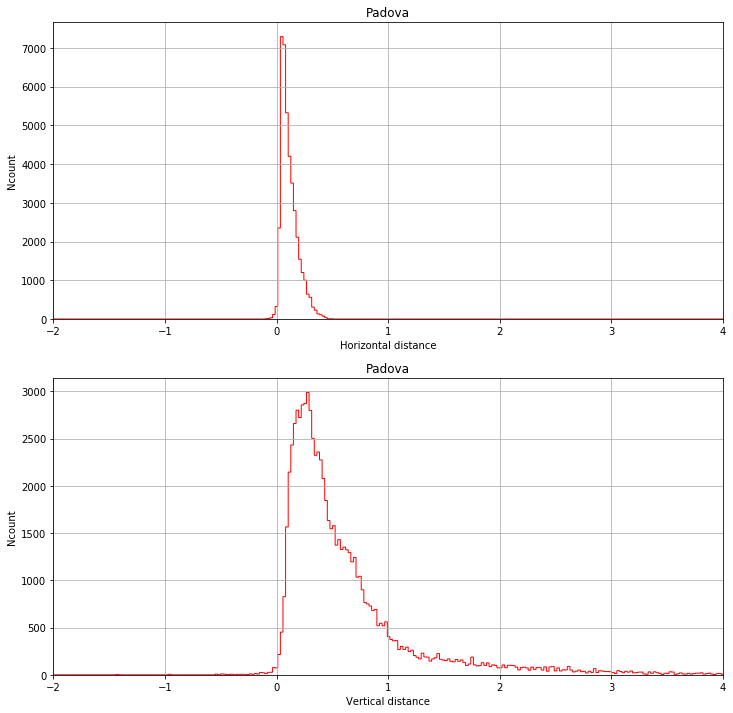

0.8 2.2


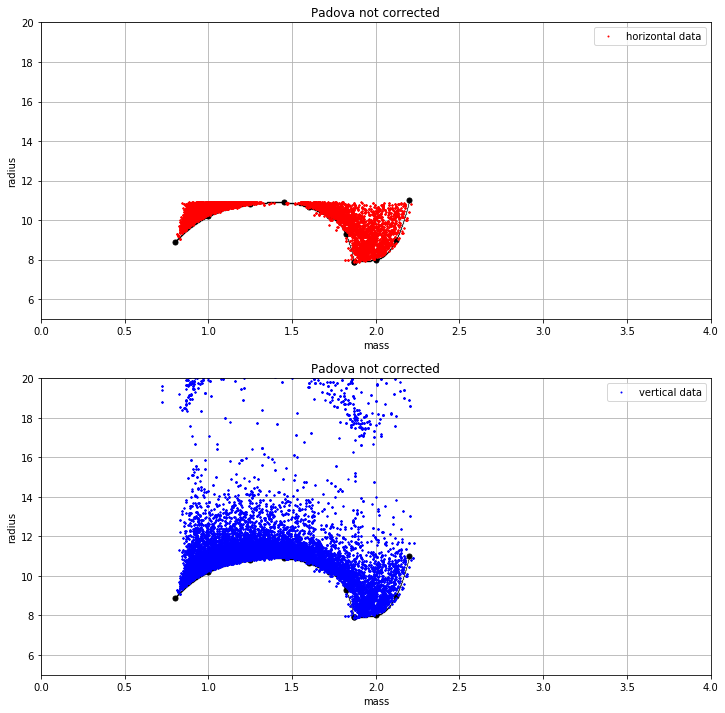

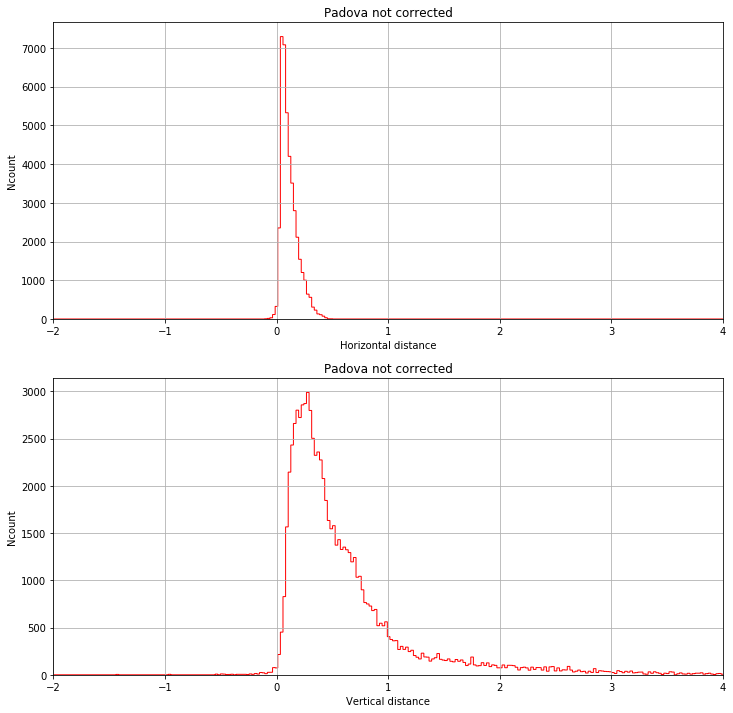

In [104]:
filepath = rootpath+"sample/padova/"
points1=[(0.8, 8.9), (1.0, 10.2), (1.25, 10.8), (1.45, 10.9), (1.60, 10.65), (1.72, 10.2),  (1.82, 9.3), (1.87, 7.9)]
points2=[(1.87, 7.9), (2.0, 8.0), (2.12, 9.0), (2.2, 11)]
points = [points1, points2]
tp = (1.87, 7.9)
title = "Padova"
edge_analysis(mpdv, rpdv, filepath, points, tp, title)

filepath = rootpath+"sample/padova_nc/"
points1=[(0.8, 8.9), (1.0, 10.2), (1.25, 10.8), (1.45, 10.9), (1.60, 10.65), (1.72, 10.2),  (1.82, 9.3), (1.87, 7.9)]
points2=[(1.87, 7.9), (2.0, 8.0), (2.12, 9.0), (2.2, 11)]
points = [points1, points2]
tp = (1.87, 7.9)
title = "Padova not corrected"
edge_analysis(mpdv_nc, rpdv_nc, filepath, points, tp, title)

In [8]:
# filepath = "sample/padova_oversampling/"
# points=[(0.8, 8.9), (1.0, 10.2), (1.25, 10.8), (1.45, 10.9), (1.60, 10.65), (1.72, 10.2),  (1.82, 9.3), (1.87, 8.0)]
# title = "Padova oversampling"
# edge_analysis(mpdvos, rpdvos, filepath, points, title)

In [7]:
# filepath = "sample/padova_oversampling_mini/"
# points=[(0.8, 8.9), (1.0, 10.2), (1.25, 10.8), (1.45, 10.9), (1.60, 10.65), (1.72, 10.2),  (1.82, 9.3), (1.87, 8.0)]
# title = "Padova oversampling with mini"
# edge_analysis(mpdvos_mini, rpdvos_mini, filepath, points, title)

# MIST He-ZAMS

In [13]:
# filepath = "sample/grids/mist/"
# files = ["00"+"{:0.0f}".format(i).zfill(2)+"000M.track.eep" for i in range(8,31)]
# mass, radius = [np.zeros(len(files)) for i in range(2)]
# for file in files:
    